## Purpose
From https://course.fast.ai/videos/?lesson=4. 

Notes - https://github.com/hiromis/notes/blob/master/pdf/Lesson4.pdf


Apply transfer learning on imdb reviews and then train for text classification.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
import pandas as pd
!pip freeze | grep fastai

fastai==1.0.57


In [2]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/achinta/.fastai/data/imdb/test'),
 PosixPath('/home/achinta/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/achinta/.fastai/data/imdb/README'),
 PosixPath('/home/achinta/.fastai/data/imdb/unsup'),
 PosixPath('/home/achinta/.fastai/data/imdb/train'),
 PosixPath('/home/achinta/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/achinta/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/achinta/.fastai/data/imdb/lm3'),
 PosixPath('/home/achinta/.fastai/data/imdb/models')]

### Using the datablock api

In [3]:
bs = 48
data_lm = TextList.from_folder(path)\
            .filter_by_folder(include=['train','test'])\
            .split_by_rand_pct(0.1)\
            .label_for_lm()\
            .databunch(bs=bs)

# note - save and load are failing with this version of fastai (1.0.57)
# data_lm.save('lm')   
# data_lm = TextLMDataBunch.load('lm')

CPU times: user 14.7 s, sys: 3.51 s, total: 18.2 s
Wall time: 51.5 s


In [4]:
data_lm.show_batch()

idx,text
0,"saga down to a two hour feature requires some , let 's say , historical license . xxmaj but this movie goes well beyond mere rounding . \n \n xxmaj there 's worse . xxmaj to tell a story from a distant period , the movie uses flashbacks which just make the story more confusing . xxmaj unless viewers have some prior knowledge of the period , they will"
1,"liam xxmaj neeson in future . xxbos xxmaj this is a comedy / romance movie directed by xxmaj andy xxmaj tennant , starring xxmaj will xxmaj smith , xxmaj eva xxmaj mendes and xxmaj kevin xxmaj james . \n \n xxmaj it is about a professional dating doctor xxunk xxmaj smith - known as ' xxmaj hitch ' who helps men to land dates with the women they are"
2,", but an xxmaj alien in a human 's body does n't ? xxmaj does that make sense ? \n \n xxmaj the xxmaj good : xxmaj still thinking ... \n \n xxmaj the xxmaj bad : xxmaj why would only one xxmaj predator come ? xxmaj and why does it pour acid over all the remnants of the "" xxmaj aliens , "" but it decides to"
3,"actors . xxmaj it 's certainly entertaining -- there 's nothing else like it , unless you count xxmaj groucho 's satirical parody in "" xxmaj animal xxmaj crackers , "" or an old xxmaj mad xxmaj magazine satire that rendered xxmaj shirley xxmaj booth 's sitcom "" xxmaj hazel "" a la "" xxmaj strange xxmaj interlude "" . xxmaj but it is n't good . xxbos xxmaj first"
4,online dating but it turns out he has a robotic arm . \n \n xxmaj the xxup dvd case rated this film 18 but even a 5 year old can watch this and not be xxunk or entertained . xxmaj the film should be rated 12 for slight scares and the swear word bloody . \n \n xxmaj all in all this film is utter shite do n't


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


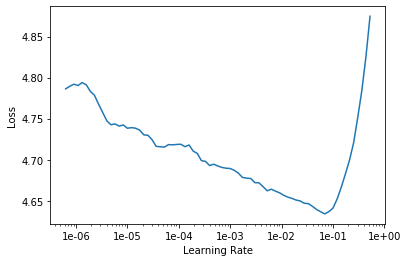

In [5]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)
learn.lr_find()
learn.recorder.plot(skip_end=15)

We will run the following cell in the background as the notebook can get disconnected. Look at lesson-4-imdb-classification.py in the same folder

In [14]:
# learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

# learn.unfreeze()
# learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))
# learner.save_encoder('enc')

In [ ]:
# learn = text_classifier_learner(data_clas, AWD_LSTM)
# learn.load_encoder('enc')
# learn.fit_one_cycle(4,moms=moms)

In [ ]:
# learn.unfreeze()
# learn.fit_one_cycle(8,slice(1e-5,1e-3),moms=moms)